In [1]:
import dgl
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(g):
    nx_g = g.to_networkx()
    # 创建matplotlib图形对象
    fig, ax = plt.subplots()
    # 可视化networkx图
    pos = nx.kamada_kawai_layout(nx_g)
    nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
    plt.show()

Graph(num_nodes=8, num_edges=6,
      ndata_schemes={}
      edata_schemes={})
Graph(num_nodes=8, num_edges=12,
      ndata_schemes={}
      edata_schemes={})


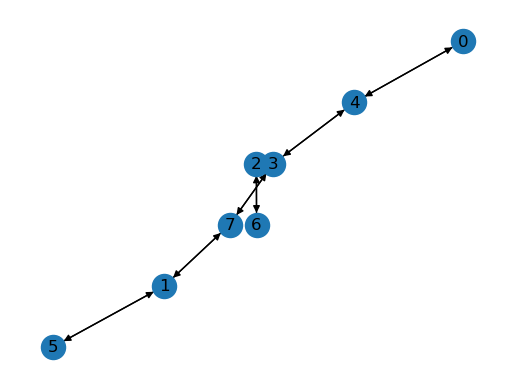

In [2]:
# 构建无向图
# g = dgl.graph(([0, 1, 1, 2, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, 15],
#                [1, 2, 3, 4, 5, 0, 0, 9, 11, 14, 16, 17, 18, 19, 18, 17, 14, 16, 18, 19]),
#               num_nodes=20)
# 生成随机边
import random
num_nodes=8
edges = []
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        if random.random() < 0.3:  # 控制边的密度，这里是30%
            edges.append((i, j))

src, dst = zip(*edges)
# self_edges = (g.nodes(), g.nodes())
# g.add_edges(*self_edges)
g = dgl.graph((src, dst), num_nodes=num_nodes)
print(g)
g = dgl.to_bidirected(g)
print(g)
# 创建图

visualize_graph(g)


In [3]:
# 2. 随机选择一些中心点
central_nodes = torch.tensor([3,5], dtype=torch.int64)

# 3. 构造一个onehot矩阵
def one_hot(y, num_class):
    return torch.eye(num_class)[y]
onehot_cn = one_hot(central_nodes, g.num_nodes()) # 2 * 8
print(onehot_cn)



NameError: name 'torch' is not defined

In [57]:

# 4. 乘邻接矩阵 (乘k次表示取出k层邻居)
# onehot_cn * adj  # 2 * 8 x 8 * 8 = 2 * 8
# 输出g的邻接矩阵
print(g.adjacency_matrix())

# 生成邻接矩阵
adj_matrix = g.adjacency_matrix()

# 将稀疏矩阵转换为标准矩阵
dense_matrix = adj_matrix.to_dense()
dense_matrix[torch.arange(g.num_nodes()), torch.arange(g.num_nodes())]=1
# 打印标准矩阵
print(dense_matrix)
sub_graph_set=onehot_cn
for i in range(3):
    sub_graph_set=torch.matmul(sub_graph_set, dense_matrix)
print(sub_graph_set)


tensor(indices=tensor([[0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5,
                        6, 6, 6, 6, 6, 7, 7],
                       [2, 5, 6, 4, 5, 0, 3, 5, 6, 7, 2, 4, 1, 3, 6, 0, 1, 2, 6,
                        0, 2, 4, 5, 7, 2, 6]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                      1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(8, 8), nnz=26, layout=torch.sparse_coo)
tensor([[1., 0., 1., 0., 0., 1., 1., 0.],
        [0., 1., 0., 0., 1., 1., 0., 0.],
        [1., 0., 1., 1., 0., 1., 1., 1.],
        [0., 0., 1., 1., 1., 0., 0., 0.],
        [0., 1., 0., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1., 1., 0.],
        [1., 0., 1., 0., 1., 1., 1., 1.],
        [0., 0., 1., 0., 0., 0., 1., 1.]])
tensor([[ 6.,  4., 10.,  7.,  8.,  7.,  9.,  5.],
        [17.,  9., 20.,  7.,  9., 19., 21., 10.]])


In [61]:
# 5. 邻接矩阵中大于1的值表示子图中包含该点，大于1的部分变为1，每行代表一个子图
sub_graph=torch.where(sub_graph_set != 0, torch.tensor(1), torch.tensor(0))
remainder_graph=torch.where(torch.sum(sub_graph_set, dim=0) != 0, torch.tensor(0), torch.tensor(1))
print(sub_graph)
print(remainder_graph)
# 将所有的子图节点全部合为集合 m 个子图，1 * m x 5中的结果，大于1的部分变为1

# 6. 训练，所有子图一起输入gcn, 用张量积取得特征

# 7. 训练完后，矩阵为 8 * 256

# 8. 2 * 8 x 8*256

tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]])
tensor([0, 0, 0, 0, 0, 0, 0, 0])


/tmp/ipykernel_19749/3098898404.py:175: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


1.10.1
Graph(num_nodes=12, num_edges=32,
      ndata_schemes={}
      edata_schemes={})


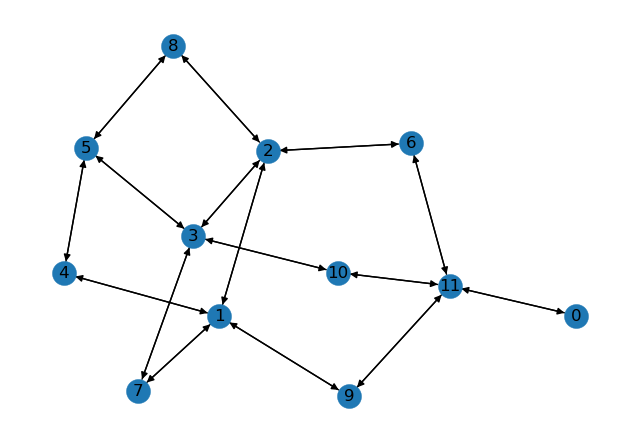

central_nodes: tensor([9], device='cuda:0')
mask time: 0.011272192001342773
mask_test time: 0.01212167739868164
central_nodes: tensor([10], device='cuda:0')
mask time: 0.015559196472167969
mask_test time: 0.003927946090698242
central_nodes: tensor([0], device='cuda:0')
mask time: 0.008096694946289062
mask_test time: 0.005998373031616211
central_nodes: tensor([9], device='cuda:0')
mask time: 0.01231241226196289
mask_test time: 0.006165981292724609
central_nodes: tensor([7], device='cuda:0')
mask time: 0.0040988922119140625
mask_test time: 0.002767324447631836
central_nodes: tensor([1], device='cuda:0')
mask time: 0.003980875015258789
mask_test time: 0.009637117385864258
central_nodes: tensor([7], device='cuda:0')
mask time: 0.004127979278564453
mask_test time: 0.0072345733642578125
central_nodes: tensor([1], device='cuda:0')
mask time: 0.005333662033081055
mask_test time: 0.002829313278198242
central_nodes: tensor([0], device='cuda:0')
mask time: 0.004708528518676758
mask_test time: 0.0

In [10]:
# 对mask及其依赖函数的测试
import functools
import time
import dgl
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(g):
    nx_g = g.to_networkx()
    # 创建matplotlib图形对象
    fig, ax = plt.subplots()
    # 可视化networkx图
    pos = nx.kamada_kawai_layout(nx_g)
    nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
    plt.show()

def readDimacsInstance(filename):
    # print filename
    g = dgl.DGLGraph()
    fin = open(filename, 'r')
    for line in fin.readlines():
        sline = line.split()
        if line.startswith('e'):
            g.add_edges(int(sline[1]), int(sline[2]))
    fin.close()
    return g

#     return mask_nodes
@functools.lru_cache(maxsize=16)
def get_neighbors_right(graph:dgl.DGLGraph, nodes:torch.Tensor, adj_matrix:torch.Tensor=None):
    """获得一个中心点列表中所有中心点的邻居，不包括中心点本身，且去重
    Args:
        graph (dgl.DGLGraph): 图对象
        nodes (torch.Tensor): 中心节点张量，1*nodes_num
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    assert nodes.is_cuda == True
    # # print(type(graph))
    adj_matrix = graph.adjacency_matrix()
    # 判断adj_matrix的是否在GPU上
    # # print(adj_matrix.is_cuda)
    adj_matrix = adj_matrix.to(nodes.device)
    # adj_matrix = adj_matrix.to(nodes.device)
    # # print(adj_matrix.device)
    assert adj_matrix.is_cuda == True

    # 获得这些节点的邻居
    neighbors = adj_matrix.index_select(0, nodes)
    # 压缩稀疏矩阵
    neighbors = neighbors.coalesce()
    # neighbors.indices()返回一个2*neighbors_num的矩阵，2 * neighbors_num，第二行是所有邻居节点标号的横向拼接
    unique_neighbors = torch.unique(neighbors.indices()[1])

    return unique_neighbors

# 多重递归获得邻居节点
@functools.lru_cache(maxsize=16)
def get_all_neighbors_right(graph:dgl.DGLGraph, nodes:torch.Tensor, depth:int, adj_matrix:torch.Tensor=None):
    """多重递归获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重
    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    if depth < 0:
        return torch.Tensor([]).to(nodes.device)
    if depth == 0:
        return nodes
    else:
        neighbors = get_neighbors_right(graph, nodes)
        neighbors = torch.cat((neighbors, nodes), dim=0)
        neighbors = torch.unique(neighbors)
        return get_all_neighbors_right(graph, neighbors, depth-1)



#     return mask_nodes
@functools.lru_cache(maxsize=16)
def get_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor, adj_matrix:torch.Tensor=None):
    """获得一个中心点列表中所有中心点的邻居，不包括中心点本身，且去重
    Args:
        graph (dgl.DGLGraph): 图对象
        nodes (torch.Tensor): 中心节点张量，1*nodes_num
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    assert nodes.is_cuda == True
    ## 用矩阵运算的方式找邻居
    one_hot_central_nodes = torch.eye(adj_matrix.shape[0]).to(nodes.device)[nodes]
    neighbors_idx = (one_hot_central_nodes @ adj_matrix).nonzero()
    neighbors_idx = neighbors_idx[:,1]
    unique_neighbors = torch.unique(neighbors_idx)

    return unique_neighbors

# 多重递归获得邻居节点
@functools.lru_cache(maxsize=16)
def get_all_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor, depth:int, adj_matrix:torch.Tensor=None):
    """多重递归获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重
    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    if adj_matrix == None:
        adj_matrix = graph.adjacency_matrix().to_dense().to(nodes.device)
    if depth < 0:
        return torch.Tensor([]).to(nodes.device)
    if depth == 0:
        return nodes
    else:
        neighbors = get_neighbors(graph, nodes, adj_matrix)
        neighbors = torch.cat((neighbors, nodes), dim=0)
        neighbors = torch.unique(neighbors)
        return get_all_neighbors(graph, neighbors, depth-1, adj_matrix)



def mask(g:dgl.DGLGraph, x:torch.Tensor, num, depth, ring_width, get_all_neighbors, central_nodes=None):
    """遮盖子图，返回遮盖节点集合和中心节点集合
    Args:
        g (dgl.DGLGraph): 输入图
        x (torch.Tensor): 特征张量
        num (int): 随机遮盖的子图数量（中心点数量）
        depth (int, optional): 遮盖节点的邻居深度. Defaults to 1.
    Returns:
        torch.Tensor: mask_nodes, 遮盖节点集合
        torch.Tensor: central_nodes, 中心节点集合，可以去除，仅用在需要查看中心节点特征的情况下，猜测当gcn层数为3时，递归深度低于3就可能导致中心节点特征丢失 todo
    """
    assert 1 <= ring_width <= depth + 1, "ring_width must be in [1, depth + 1]"
    num_nodes = g.num_nodes()
    adj_matrix = g.adjacency_matrix().to_dense().to(x.device)

    if central_nodes == None:
        perm = torch.randperm(num_nodes, device=x.device)
        central_nodes = perm[: num]

    # print(central_nodes.device)
    assert type(central_nodes) == torch.Tensor
    # 判断central_nodes的shape为1*num
    central_nodes = central_nodes.to(x.device)
    # print(nodes)
    assert central_nodes.is_cuda == True

    # 外圆节点集合(含中心点)
    connected_nodes_out = get_all_neighbors(g, central_nodes, depth, adj_matrix)
    assert type(connected_nodes_out) == torch.Tensor
    mask_nodes_out = torch.cat((central_nodes, connected_nodes_out), dim=0)
    mask_nodes_out = torch.unique(mask_nodes_out)

    # 内圆节点集合(含中心点)
    not_mask_nodes = get_all_neighbors(g, central_nodes,depth - ring_width, adj_matrix)
    not_mask_nodes = torch.cat((central_nodes, not_mask_nodes), dim=0)
    not_mask_nodes = torch.unique(not_mask_nodes)

    # 环形应遮盖节点集合，有于torch的集合操作，返回的mask_nodes一定是无重复的
    # mask_nodes = torch.masked_select(mask_nodes_out, torch.isin(mask_nodes_out, not_mask_nodes))
    mask_nodes = torch.masked_select(mask_nodes_out, torch.logical_not(torch.isin(mask_nodes_out, not_mask_nodes)))

    return mask_nodes, central_nodes

import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
# import numpy as np

plt.style.use('seaborn')

print(torch.__version__)
g = dgl.DGLGraph()

# # 小型测试图
# g.add_edges(
#     [1,1,2,2,4,5,5, 0],
#     [7,3,3,4,5,8,6, 7]
# )


# 大型测试图
## 加载 col 格式的图数据集
g = readDimacsInstance("temp.col")
## 将数据集转换为 dgl.graph 对象

g = dgl.to_bidirected(g)

print(g)

visualize_graph(g)

g = g.to(torch.device('cuda'))
temp_tensor = torch.tensor([1,2,3,4,5,6,7,8,9,10]).to(torch.device('cuda'))

# # 矩阵法找邻居原型demo
# central_nodes = torch.tensor([1], dtype=torch.int64).to(torch.device('cuda'))
# print("central_nodes:", central_nodes)
# print(g.adjacency_matrix().to_dense())
# adj_matrix = g.adjacency_matrix().to_dense()
# ## 用矩阵运算的方式找邻居
# one_hot_central_nodes = torch.eye(adj_matrix.shape[0])[central_nodes]
# print(one_hot_central_nodes)
# print(one_hot_central_nodes @ adj_matrix)
# neighbors_idx = (one_hot_central_nodes @ adj_matrix).nonzero()
# neighbors_idx = neighbors_idx[:,1]
# print(neighbors_idx)
# neighbors_idx2 = (one_hot_central_nodes @ adj_matrix @ adj_matrix).nonzero()
# neighbors_idx2 = neighbors_idx2[:,1]
# print(neighbors_idx2)


# 开始测试
num = 1
# depth = random.randint(1, 5)
depth = 1 
# ring_width = random.randint(1, depth + 1)
ring_width = 1
test_times = 100

log = open("log.txt", "w")

## 有效测试次数
effective_test_times = 0
for i in range(test_times):
    central_nodes = torch.randint(0, g.num_nodes(), (num, ), dtype=torch.int64).to(torch.device('cuda'))
    print(f"central_nodes: {central_nodes}")
    start_time = time.time()
    mask_nodes, central_nodes = mask(g, temp_tensor, num, depth, ring_width, get_all_neighbors_right, central_nodes)
    print(f"mask time: {time.time() - start_time}")
    start_time = time.time()
    mask_nodes_test, central_nodes_test = mask(g, temp_tensor, num, depth, ring_width, get_all_neighbors, central_nodes)
    print(f"mask_test time: {time.time() - start_time}")
    if (torch.equal(central_nodes, central_nodes_test)):
        effective_test_times += 1 
        # print("mask: ", mask_nodes)
        # print("mask_test: ", mask_nodes_test)
        # print("central:", central_nodes)
        # print("central_test: ", central_nodes_test)
        assert torch.equal(mask_nodes, mask_nodes_test), (mask_nodes, mask_nodes_test)
        log.write(f"mask: {mask_nodes}\n")
        log.write(f"mask_test: {mask_nodes_test}\n")
        assert torch.equal(central_nodes, central_nodes_test), (central_nodes, central_nodes_test)
log.close()
print(f"effective_test_times/test_times: {effective_test_times}/{test_times}")

/tmp/ipykernel_19749/426541729.py:272: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


1.10.1


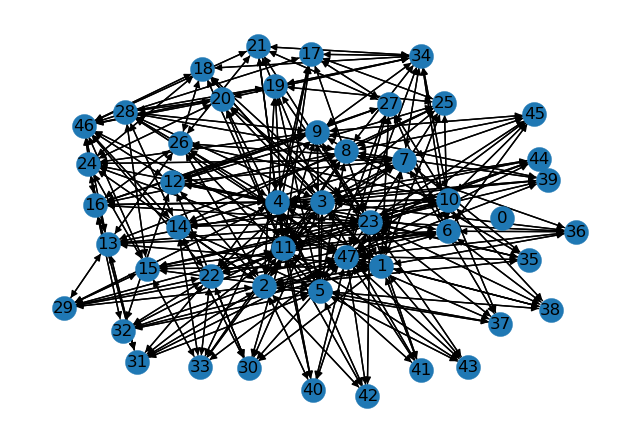

mask time: 0.10097169876098633
mask_test time: 0.05510306358337402
mask time: 0.004148960113525391
mask_test time: 0.0035495758056640625
mask time: 0.009432554244995117
mask_test time: 0.0052263736724853516
mask time: 0.0622560977935791
mask_test time: 0.029473066329956055
mask time: 0.06068849563598633
mask_test time: 0.015365362167358398
mask time: 0.01698160171508789
mask_test time: 0.014757633209228516
mask time: 0.04314565658569336
mask_test time: 0.022043466567993164
mask time: 0.0243072509765625
mask_test time: 0.007735490798950195
mask time: 0.04556846618652344
mask_test time: 0.01591348648071289
mask time: 0.013452291488647461
mask_test time: 0.005883693695068359
mask time: 0.05354475975036621
mask_test time: 0.01975727081298828
mask time: 0.05971074104309082
mask_test time: 0.016389846801757812
mask time: 0.0608525276184082
mask_test time: 0.020174026489257812
mask time: 0.04118537902832031
mask_test time: 0.018472909927368164
mask time: 0.05909323692321777
mask_test time: 0.

KeyboardInterrupt: 

In [44]:
# 对mask及其依赖函数的测试
import functools
import time
import dgl
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(g, select_nodes=None, color='red'):
    nx_g = g.to_networkx()
    # 创建matplotlib图形对象
    fig, ax = plt.subplots()
    # 可视化networkx图
    
    pos = nx.kamada_kawai_layout(nx_g)
    
    if select_nodes != None:
        nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
        nx.draw_networkx_nodes(nx_g, pos=pos, nodelist=select_nodes, node_color=color, ax=ax)
    else: 
        nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
    plt.show()

def readDimacsInstance(filename):
    # print filename
    g = dgl.DGLGraph()
    fin = open(filename, 'r')
    for line in fin.readlines():
        sline = line.split()
        if line.startswith('e'):
            g.add_edges(int(sline[1]), int(sline[2]))
    fin.close()
    return g

#     return mask_nodes
@functools.lru_cache(maxsize=16)
def get_neighbors_right(graph:dgl.DGLGraph, nodes:torch.Tensor):
    """获得一个中心点列表中所有中心点的邻居，不包括中心点本身，且去重
    Args:
        graph (dgl.DGLGraph): 图对象
        nodes (torch.Tensor): 中心节点张量，1*nodes_num
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    assert nodes.is_cuda == True
    # # print(type(graph))
    adj_matrix = graph.adjacency_matrix()
    # 判断adj_matrix的是否在GPU上
    # # print(adj_matrix.is_cuda)
    adj_matrix = adj_matrix.to(nodes.device)
    # adj_matrix = adj_matrix.to(nodes.device)
    # # print(adj_matrix.device)
    assert adj_matrix.is_cuda == True

    # 获得这些节点的邻居
    neighbors = adj_matrix.index_select(0, nodes)
    # 压缩稀疏矩阵
    neighbors = neighbors.coalesce()
    # neighbors.indices()返回一个2*neighbors_num的矩阵，2 * neighbors_num，第二行是所有邻居节点标号的横向拼接
    unique_neighbors = torch.unique(neighbors.indices()[1])

    return unique_neighbors

# 多重递归获得邻居节点
@functools.lru_cache(maxsize=16)
def get_all_neighbors_right(graph:dgl.DGLGraph, nodes:torch.Tensor, depth:int):
    """多重递归获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重
    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
    """
    if depth < 0:
        return torch.Tensor([]).to(nodes.device)
    if depth == 0:
        return nodes
    else:
        neighbors = get_neighbors_right(graph, nodes)
        neighbors = torch.cat((neighbors, nodes), dim=0)
        neighbors = torch.unique(neighbors)
        return get_all_neighbors_right(graph, neighbors, depth-1)




def mask_right(g:dgl.DGLGraph, x:torch.Tensor, num, depth, ring_width, central_nodes=None):
    """遮盖子图，返回遮盖节点集合和中心节点集合
    Args:
        g (dgl.DGLGraph): 输入图
        x (torch.Tensor): 特征张量
        num (int): 随机遮盖的子图数量（中心点数量）
        depth (int, optional): 遮盖节点的邻居深度. Defaults to 1.
    Returns:
        torch.Tensor: mask_nodes, 遮盖节点集合
        torch.Tensor: central_nodes, 中心节点集合，可以去除，仅用在需要查看中心节点特征的情况下，猜测当gcn层数为3时，递归深度低于3就可能导致中心节点特征丢失 todo
    """
    assert 1 <= ring_width <= depth + 1, "ring_width must be in [1, depth + 1]"
    num_nodes = g.num_nodes()

    if central_nodes == None:
        perm = torch.randperm(num_nodes, device=x.device)
        central_nodes = perm[: num]

    # print(central_nodes.device)
    assert type(central_nodes) == torch.Tensor
    # 判断central_nodes的shape为1*num
    central_nodes = central_nodes.to(x.device)
    # print(nodes)
    assert central_nodes.is_cuda == True

    # 外圆节点集合(含中心点)
    mask_nodes_out = get_all_neighbors_right(g, central_nodes, depth)
    assert type(mask_nodes_out) == torch.Tensor

    # 内圆节点集合(含中心点)
    not_mask_nodes = get_all_neighbors_right(g, central_nodes,depth - ring_width)
    # not_mask_nodes = torch.cat((central_nodes, not_mask_nodes), dim=0)
    # not_mask_nodes = torch.unique(not_mask_nodes)

    # 环形应遮盖节点集合，有于torch的集合操作，返回的mask_nodes一定是无重复的
    # mask_nodes = torch.masked_select(mask_nodes_out, torch.isin(mask_nodes_out, not_mask_nodes))
    mask_nodes = torch.masked_select(mask_nodes_out, torch.logical_not(torch.isin(mask_nodes_out, not_mask_nodes)))

    # mask_nodes可能没有元素，这种情况在没有邻居的情况下会出现，此时环内可能没有节点，这种情况应该返回空集

    return mask_nodes, central_nodes

    

# #     return mask_nodes
# @functools.lru_cache(maxsize=16)
# def get_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor, adj_matrix:torch.Tensor=None):
#     """获得一个中心点列表中所有中心点的邻居，不包括中心点本身，且去重
#     Args:
#         graph (dgl.DGLGraph): 图对象
#         nodes (torch.Tensor): 中心节点张量，1*nodes_num
#     Returns:
#         torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
#     """
#     assert nodes.is_cuda == True
#     ## 用矩阵运算的方式找邻居
#     one_hot_central_nodes = torch.eye(adj_matrix.shape[0]).to(nodes.device)[nodes]
#     neighbors_idx = (one_hot_central_nodes @ adj_matrix).nonzero()
#     neighbors_idx = neighbors_idx[:,1]
#     unique_neighbors = torch.unique(neighbors_idx)

#     return unique_neighbors

# @functools.lru_cache(maxsize=16)
def get_all_neighbors(graph:dgl.DGLGraph, nodes:torch.Tensor, depth:int, adj_matrix:torch.Tensor=None):
    """获得邻居节点集合张量（逻辑上是集合，物理数据结构为torch.Tensor），且去重
    Args:
        graph (dgl.DGLGraph): 输入图
        nodes (torch.Tensor): 中心节点集合张量，1*nodes_num
        depth (int): 递归深度，为0时相当于点遮盖，直接返回nodes
    Returns:
        torch.Tensor: 所有中心点的邻居节点组成的无重复节点张量, 1*neighbors_num
        torch.Tensor: 每层外扩获得的邻居节点组成的无重复节点张量, depth*neighbors_num，0位置是第一层的邻居，1位置是第二层的邻居，以此类推
    """
    if adj_matrix == None:
        adj_matrix = graph.adjacency_matrix().to(nodes.device)
    if depth < 0:
        return torch.Tensor([]).to(nodes.device)
    if depth == 0:
        return nodes
    else:
        level_neighbors = [] # 用于存储每一层的邻居
        level_neighbors.append(nodes) # 用level_neighbors[0]存储中心点
        one_hot_central_nodes = torch.eye(adj_matrix.shape[0]).to(nodes.device)[nodes]
        # current_mat = one_hot_central_nodes @ adj_matrix
        current_mat = torch.sparse.mm(adj_matrix, one_hot_central_nodes.T)
        current_neighbors = (current_mat).nonzero()
        # print('current_neighbors: ', current_neighbors)
        neighbors = current_neighbors[:,0]
        neighbors = torch.cat((neighbors, level_neighbors[0]), dim=0)
        neighbors = torch.unique(neighbors)
        # neighbors = torch.unique(neighbors)
        level_neighbors.append(neighbors)
        for i in range(2, depth + 1):

            current_mat = torch.sparse.mm(adj_matrix, current_mat)
            current_neighbors = current_mat.nonzero()
            neighbors = current_neighbors[:,0]
            neighbors = torch.cat((neighbors, level_neighbors[i - 1]), dim=0)
            neighbors = torch.unique(neighbors)
            # neighbors = torch.masked_select(neighbors, torch.logical_not(torch.isin(neighbors, level_neighbors[i - 1])))
            level_neighbors.append(neighbors)
        assert neighbors.is_cuda == True
        # print("level_neighbors: ", level_neighbors)
        # print("central_nodes: ", nodes)
        return neighbors, level_neighbors

def mask(g:dgl.DGLGraph, x:torch.Tensor, num, depth, ring_width, central_nodes=None):
    """遮盖子图，返回遮盖节点集合和中心节点集合
    1. 此处采用的方式是将两个圆形子图做集合差，得到环形子图
    2. 还存在一种方式是将多个不同距离的邻居集合做集合并，得到环形子图
    采用 1 会出现如下问题：
        对于图:
        1-2-3
        1-3
        从 1 出发到 3 有两条路径，当我们取 depth = 2，ring_width = 1 时，我们得到 Mask_nodes 为空集
        这可能会导致遮盖的点集较少，且无法成为一个严格的环
    采用 2 会出现如下问题：
        对于图:
        1-2-3-4-5
        从 1 出发，当我们取 depth = 4，ring_width = 1 时，计算距离为2的邻居时可能会走“回头路”（1->2->1）这会导致出现一些很奇怪的现象，找距离固定的邻居时候出现回头，同一距离的邻居点形成类似水波涟漪的同心环结构，遮盖的点稀疏且有一定规律，利于重建
        对于图:
        1-2 --- 3 --- 4
         \  \   /   /
          \ 7 - 5 /
            ---8-- 
        从 1 出发，当我们取 depth = 3，ring_width = 1 时，计算距离为2的邻居时可能会走“回头路”，导致 2345 全部被遮，这会导致被遮盖的点过于集中，遮盖的时候丢失过多信息
    综上，我们认为 1 更加稳定一些，对 2 来说，同一种方法在不同的图上表现出的效果各不相同，可以作为未来的尝试
    Args:
        g (dgl.DGLGraph): 输入图
        x (torch.Tensor): 特征张量
        num (int): 随机遮盖的子图数量（中心点数量）
        depth (int, optional): 遮盖节点的邻居深度. Defaults to 1.
    Returns:
        torch.Tensor: mask_nodes, 遮盖节点集合
        torch.Tensor: central_nodes, 中心节点集合，可以去除，仅用在需要查看中心节点特征的情况下，猜测当gcn层数为3时，递归深度低于3就可能导致中心节点特征丢失 todo
    """
    assert 1 <= ring_width <= depth + 1, "ring_width must be in [1, depth + 1]"
    num_nodes = g.num_nodes()
    adj_matrix = g.adjacency_matrix().to(x.device)

    if central_nodes == None:
        perm = torch.randperm(num_nodes, device=x.device)
        central_nodes = perm[: num]

    # print(central_nodes.device)
    assert type(central_nodes) == torch.Tensor
    # 判断central_nodes的shape为1*num
    central_nodes = central_nodes.to(x.device)
    # print(nodes)
    assert central_nodes.is_cuda == True

    # 外圆节点集合(含中心点)
    connected_nodes_out, level_neighbors = get_all_neighbors(g, central_nodes, depth, adj_matrix)
    assert type(connected_nodes_out) == torch.Tensor
    mask_nodes_out = torch.cat((central_nodes, connected_nodes_out), dim=0)
    mask_nodes_out = torch.unique(mask_nodes_out)

    # 内圆节点集合(含中心点)
    if (depth - ring_width) >= 0:
        not_mask_nodes = level_neighbors[depth - ring_width]
    else:
        not_mask_nodes = torch.Tensor([]).to(x.device) 



    # not_mask_nodes = get_all_neighbors(g, central_nodes,depth - ring_width, adj_matrix)
    # not_mask_nodes = torch.cat((central_nodes, not_mask_nodes), dim=0)
    # not_mask_nodes = torch.unique(not_mask_nodes)

    # 环形应遮盖节点集合，有于torch的集合操作，返回的mask_nodes一定是无重复的
    # mask_nodes = torch.masked_select(mask_nodes_out, torch.isin(mask_nodes_out, not_mask_nodes))
    mask_nodes = torch.masked_select(mask_nodes_out, torch.logical_not(torch.isin(mask_nodes_out, not_mask_nodes)))

    return mask_nodes, central_nodes


import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
# import numpy as np

plt.style.use('seaborn')

print(torch.__version__)
g = dgl.DGLGraph()

# # 小型测试图
# g.add_edges(
#     [1,1,2,2,4,5,5, 0],
#     [7,3,3,4,5,8,6, 7]
# )


# 大型测试图
## 加载 col 格式的图数据集
g = readDimacsInstance("myciel5.col")
## 将数据集转换为 dgl.graph 对象

g = dgl.to_bidirected(g)

# print(g)

visualize_graph(g)

g = g.to(torch.device('cuda'))
temp_tensor = torch.tensor([1,2,3,4,5,6,7,8,9,10]).to(torch.device('cuda'))

# # 矩阵法找邻居原型demo
# central_nodes = torch.tensor([1], dtype=torch.int64).to(torch.device('cuda'))
# print("central_nodes:", central_nodes)
# print(g.adjacency_matrix().to_dense())
# adj_matrix = g.adjacency_matrix().to_dense()
# ## 用矩阵运算的方式找邻居
# one_hot_central_nodes = torch.eye(adj_matrix.shape[0])[central_nodes]
# print(one_hot_central_nodes)
# print(one_hot_central_nodes @ adj_matrix)
# neighbors_idx = (one_hot_central_nodes @ adj_matrix).nonzero()
# neighbors_idx = neighbors_idx[:,1]
# print(neighbors_idx)
# neighbors_idx2 = (one_hot_central_nodes @ adj_matrix @ adj_matrix).nonzero()
# neighbors_idx2 = neighbors_idx2[:,1]
# print(neighbors_idx2)


# 开始测试
test_times = 1000
num = 1
## 有效测试次数
effective_test_times = 0
for iter in range(test_times):
    depth = random.randint(1, 15)
    ring_width = random.randint(1, depth + 1)

    log = open("log.txt", "w")
    
    central_nodes = torch.randint(0, g.num_nodes(), (num, ), dtype=torch.int64).to(torch.device('cuda'))
    log.write(f"central_nodes: {central_nodes}\n")
    start_time = time.time()
    mask_nodes, central_nodes = mask_right(g, temp_tensor, num, depth, ring_width, central_nodes)
    print(f"mask time: {time.time() - start_time}")
    start_time = time.time()
    mask_nodes_test, central_nodes_test = mask(g, temp_tensor, num, depth, ring_width, central_nodes)
    print(f"mask_test time: {time.time() - start_time}")
    if (torch.equal(central_nodes, central_nodes_test)):
        effective_test_times += 1 
        # print("mask: ", mask_nodes)
        # print("mask_test: ", mask_nodes_test)
        # print("central:", central_nodes)
        # print("central_test: ", central_nodes_test)
        assert torch.equal(mask_nodes, mask_nodes_test), f"mask_nodes: {mask_nodes}, mask_nodes_test: {mask_nodes_test}\n\ncentral_nodes: {central_nodes}\n\ndepth: {depth},ring_width: {ring_width}\n\n"
        log.write(f"mask_nodes: {mask_nodes}\n")
        log.write(f"mask_nodes_test: {mask_nodes_test}\n\n") 
        assert torch.equal(central_nodes, central_nodes_test), (central_nodes, central_nodes_test)
log.close()
print(f"effective_test_times/test_times: {effective_test_times}/{test_times}")

/tmp/ipykernel_19749/4240778070.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


1.10.1


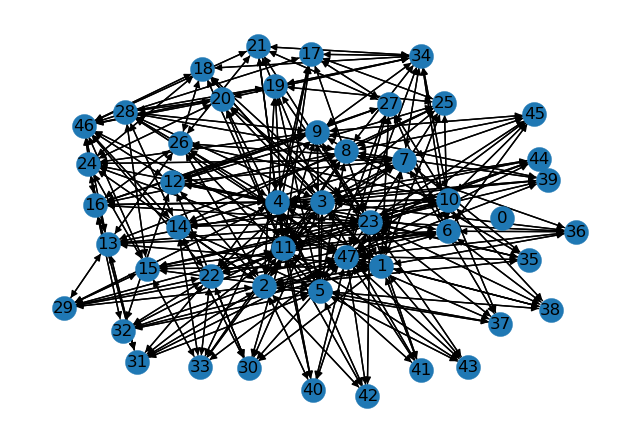

tensor([[21., 24., 27.],
        [39., 48., 57.],
        [ 0.,  0.,  0.]])


In [20]:
# 稀疏矩阵乘法
import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
# import numpy as np

plt.style.use('seaborn')

print(torch.__version__)
g = dgl.DGLGraph()

# # 小型测试图
# g.add_edges(
#     [1,1,2,2,4,5,5, 0],
#     [7,3,3,4,5,8,6, 7]
# )


# 大型测试图
## 加载 col 格式的图数据集
g = readDimacsInstance("myciel5.col")
## 将数据集转换为 dgl.graph 对象

g = dgl.to_bidirected(g)

# print(g)

visualize_graph(g)

g = g.to(torch.device('cuda'))
temp_tensor = torch.tensor([1,2,3,4,5,6,7,8,9,10]).to(torch.device('cuda'))
g.adjacency_matrix()

# 创建一个稀疏矩阵
indices = torch.tensor([[0, 1, 1], [2, 0, 2]])
values = torch.tensor([3., 4., 5.])
sparse_matrix = torch.sparse_coo_tensor(indices, values, size=(3, 3))

assert type(sparse_matrix) == type(g.adjacency_matrix())

# # 创建一个稠密矩阵
dense_matrix = torch.tensor([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])

# # 计算稀疏矩阵和稠密矩阵的乘积
# result = torch.mm(dense_matrix, sparse_matrix)
result = torch.sparse.mm(sparse_matrix, dense_matrix)

print(result)

1.10.1


/tmp/ipykernel_19749/2852604267.py:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


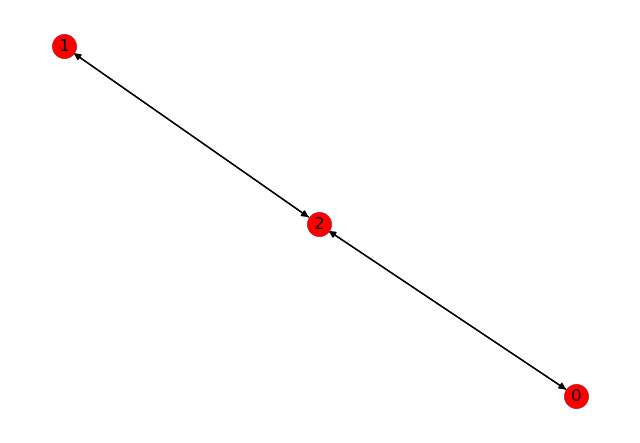

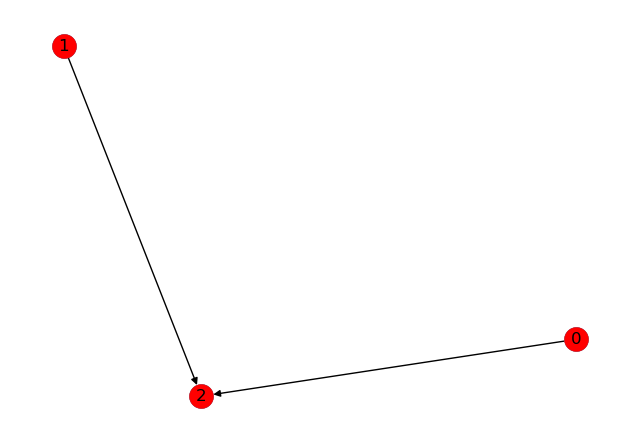

for time: 0.006922006607055664
tensor(0) tensor(3)
tensor(3) tensor(6)
tensor([3, 3]) tensor([0, 3, 6]) tensor([2, 4])


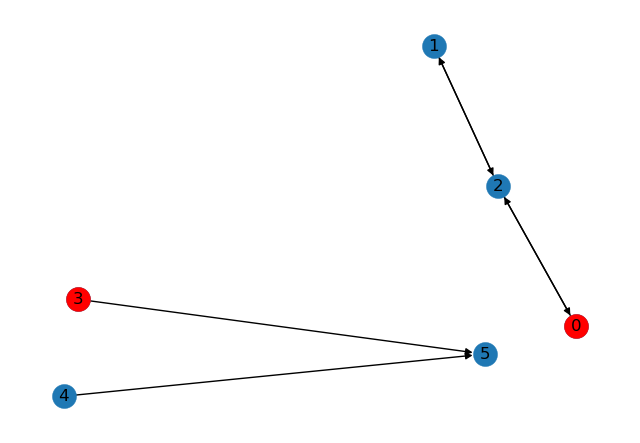

In [89]:
# 稀疏矩阵乘法
import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
import functools
import time
import dgl
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(g, select_nodes=None, color='red'):
    nx_g = g.to_networkx()
    # 创建matplotlib图形对象
    fig, ax = plt.subplots()
    # 可视化networkx图
    
    pos = nx.kamada_kawai_layout(nx_g)
    
    nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
    nx.draw_networkx_nodes(nx_g, pos=pos, nodelist=select_nodes, node_color=color, ax=ax)
    plt.show()

def readDimacsInstance(filename):
    # print filename
    g = dgl.DGLGraph()
    fin = open(filename, 'r')
    for line in fin.readlines():
        sline = line.split()
        if line.startswith('e'):
            g.add_edges(int(sline[1]), int(sline[2]))
    fin.close()
    return g

# import numpy as np

plt.style.use('seaborn')

print(torch.__version__)
g = dgl.DGLGraph()

# # 小型测试图
# g.add_edges(
#     [1,1,2,2,4,5,5, 0],
#     [7,3,3,4,5,8,6, 7]
# )


# 大型测试图
## 加载 col 格式的图数据集
g = readDimacsInstance("mini.col")
## 将数据集转换为 dgl.graph 对象
g = dgl.to_bidirected(g)
visualize_graph(g)

g2 = dgl.DGLGraph()
g2 = readDimacsInstance("mini.col")
visualize_graph(g2)


# g = g.to(torch.device('cuda'))
# g2 = g2.to(torch.device('cuda'))

temp_tensor = torch.tensor([1,2,3,4,5,6,7,8,9,10]).to(torch.device('cpu'))

# 生成 batched graph
batched_graph = dgl.batch([g, g2])

start_time = time.time()
co = 0
for i in range(188):
    for j in range(500):
        co += 1
print(f"for time: {time.time() - start_time}")
        

batch_num_nodes = batched_graph.batch_num_nodes()

# 生成一个idx，用于索引batched graph中的节点
idx = torch.zeros(len(batch_num_nodes) + 1, dtype=torch.int64)
for i in range(1, len(batch_num_nodes) + 1):
    idx[i] = idx[i - 1] + batch_num_nodes[i - 1]
random_idx = torch.zeros(len(batch_num_nodes), dtype=torch.int64)
for i in range(0, len(idx) - 1):
    print(idx[i], idx[i + 1])
    # 生成一个 batch_num_nodes[i] - batch_num_nodes[i + 1] 之间的随机数
    random_idx[i] = random.randint(idx[i], idx[i + 1] - 1)

# # 判断 random_idx 正确性
# test_times = 100
# for i in test_times:
#     batch_num_nodes = batched_graph.batch_num_nodes()

#     # 生成一个idx，用于索引batched graph中的节点
#     idx = torch.zeros(len(batch_num_nodes) + 1, dtype=torch.int64)
#     for i in range(1, len(batch_num_nodes) + 1):
#         idx[i] = idx[i - 1] + batch_num_nodes[i - 1]
#     random_idx = torch.zeros(len(batch_num_nodes), dtype=torch.int64)
#     for i in range(0, len(idx) - 1):
#         print(idx[i], idx[i + 1])
#         # 生成一个 batch_num_nodes[i] - batch_num_nodes[i + 1] 之间的随机数
#         random_idx[i] = random.randint(idx[i], idx[i + 1] - 1)
#     for i in random_idx:




    

print(batch_num_nodes, idx, random_idx)

visualize_graph(batched_graph, select_nodes=idx[:-1].numpy())

1.10.1


/tmp/ipykernel_22576/1067097611.py:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/opt/conda/envs/graph/lib/python3.8/site-packages/dgl/heterograph.py:72: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning('Recommend creating graphs by `dgl.graph(data)`'


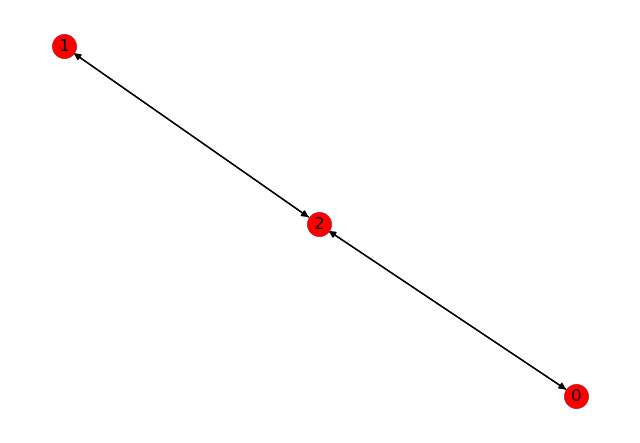

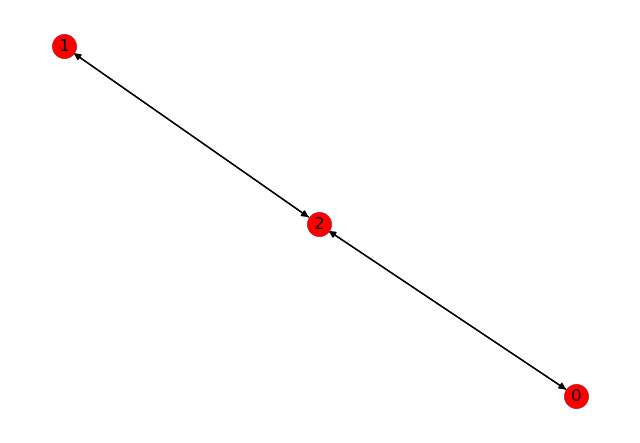

for time: 0.009600400924682617
tensor(0) tensor(3)
(tensor([2]), tensor([0]))
tensor([0, 1, 2])
all (tensor([2]), tensor([0]), tensor([0]))
tensor([3]) tensor([0, 3]) tensor([0])


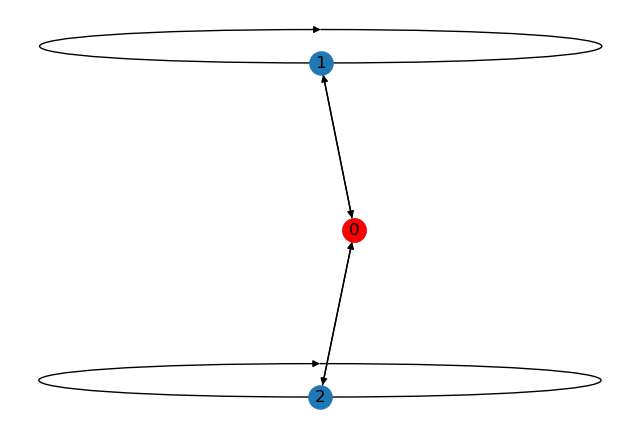

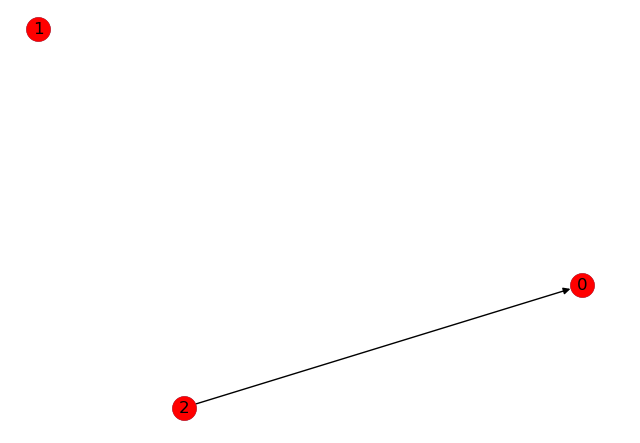

In [4]:
# 稀疏矩阵乘法
import torch
import networkx as nx
import matplotlib.pyplot as plt
import dgl
import functools
import time
import dgl
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(g, select_nodes=None, color='red'):
    nx_g = g.to_networkx()
    # 创建matplotlib图形对象
    fig, ax = plt.subplots()
    # 可视化networkx图
    
    pos = nx.kamada_kawai_layout(nx_g)
    
    nx.draw(nx_g, pos=pos, with_labels=True, ax=ax)
    nx.draw_networkx_nodes(nx_g, pos=pos, nodelist=select_nodes, node_color=color, ax=ax)
    plt.show()

def readDimacsInstance(filename):
    # print filename
    g = dgl.DGLGraph()
    fin = open(filename, 'r')
    for line in fin.readlines():
        sline = line.split()
        if line.startswith('e'):
            g.add_edges(int(sline[1]), int(sline[2]))
    fin.close()
    return g

# import numpy as np

plt.style.use('seaborn')

print(torch.__version__)
g = dgl.DGLGraph()

# # 小型测试图
# g.add_edges(
#     [1,1,2,2,4,5,5, 0],
#     [7,3,3,4,5,8,6, 7]
# )


# 大型测试图
## 加载 col 格式的图数据集
g = readDimacsInstance("mini.col")
## 将数据集转换为 dgl.graph 对象
g = dgl.to_bidirected(g)
visualize_graph(g)

g2 = dgl.DGLGraph()
g2 = readDimacsInstance("mini.col")
g2 = dgl.to_bidirected(g2)
visualize_graph(g2)


# g = g.to(torch.device('cuda'))
# g2 = g2.to(torch.device('cuda'))

temp_tensor = torch.tensor([1,2,3,4,5,6,7,8,9,10]).to(torch.device('cpu'))

# 生成 batched graph
batched_graph = dgl.batch([g, g2])

batched_graph = dgl.graph(([0, 0, 1, 1, 2, 2], [1, 2, 0, 1, 2, 0]))

start_time = time.time()
co = 0
for i in range(188):
    for j in range(500):
        co += 1
print(f"for time: {time.time() - start_time}")
        

batch_num_nodes = batched_graph.batch_num_nodes()

# 生成一个idx，用于索引batched graph中的节点
idx = torch.zeros(len(batch_num_nodes) + 1, dtype=torch.int64)
for i in range(1, len(batch_num_nodes) + 1):
    idx[i] = idx[i - 1] + batch_num_nodes[i - 1]
random_idx = torch.zeros(len(batch_num_nodes), dtype=torch.int64)
for i in range(0, len(idx) - 1):
    print(idx[i], idx[i + 1])
    # 生成一个 batch_num_nodes[i] - batch_num_nodes[i + 1] 之间的随机数
    random_idx[i] = random.randint(idx[i], idx[i + 1] - 1)


sg = dgl.sampling.sample_neighbors(batched_graph, random_idx, 1)

print(sg.edges(order='eid'))
print(sg.nodes())
print("all", sg.all_edges(form='all'))

# # 判断 random_idx 正确性
# test_times = 100
# for i in test_times:
#     batch_num_nodes = batched_graph.batch_num_nodes()

#     # 生成一个idx，用于索引batched graph中的节点
#     idx = torch.zeros(len(batch_num_nodes) + 1, dtype=torch.int64)
#     for i in range(1, len(batch_num_nodes) + 1):
#         idx[i] = idx[i - 1] + batch_num_nodes[i - 1]
#     random_idx = torch.zeros(len(batch_num_nodes), dtype=torch.int64)
#     for i in range(0, len(idx) - 1):
#         print(idx[i], idx[i + 1])
#         # 生成一个 batch_num_nodes[i] - batch_num_nodes[i + 1] 之间的随机数
#         random_idx[i] = random.randint(idx[i], idx[i + 1] - 1)
#     for i in random_idx:




    

print(batch_num_nodes, idx, random_idx)

visualize_graph(batched_graph, select_nodes=idx[:-1].numpy())

visualize_graph(sg)